In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['user name', 'comments', 'madhura_makeupnhair', 'Can’t wait for season 2!!!', '"battatawada', 'Verified"', 'Verified', 'abby_racer20', '@harshita1210 Miss Sanyukta.. wat abt Sadda Haq??', 'mirahul03', 'Kab aayegi मिर्ज़ापुर', 'harshitasinha122', 'Yayyy 🤗🤗🤗', 'nikkhiillllll', '@divyenndu', 'samannawaj123', 'I am Big Fan of Mirzapur Series', '_beingasifkhan', 'Aur kitna wait karaoge yrr tum log abhi bhabhi or raja ka Scene dekh ke kaam chalana padta hai', 'harshitasinha122', '💞', 'harshitasinha122', '👌👌👌', 'harshitasinha122', '👌👌👌', 'krishna_akkian', '25 September may be', 'siyasingh2801', '😍😍', 'siyasingh2801', 'Wai', 'siyasingh2801', 'Waiting baby❤️❤️', 'siyasingh2801', 'Plz be safe love....take care of yourself❤️❤️', 'sagarnitesh55', 'Oh my god😍😘 you are so lovely !❤️', 'harsh_k_pvt', 'Most awating❤️😭', 'iamsudipamanna', '❤️', 'dharmesh.dy', 'Excited 😍', 'krishnagopal.paul_o

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: 'U' mode is deprecated
  


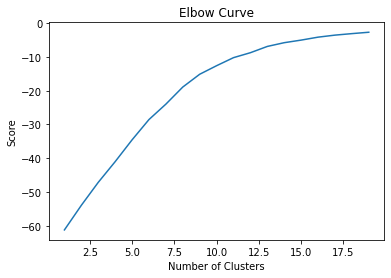

Performing LSA Dimension Reduction
done in 0.016604s

AFTER LSA matrix reduction: 
n_samples: 273, n_features: 10
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
done in 0.035s



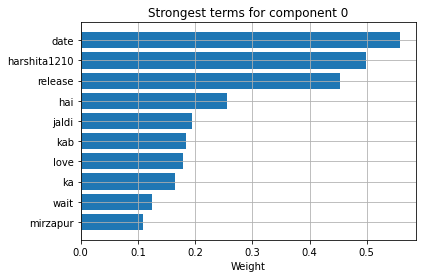

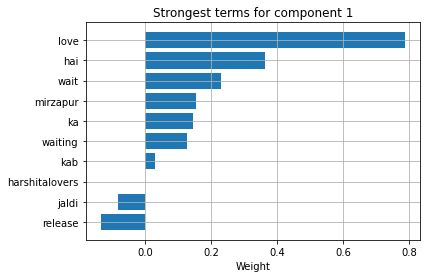

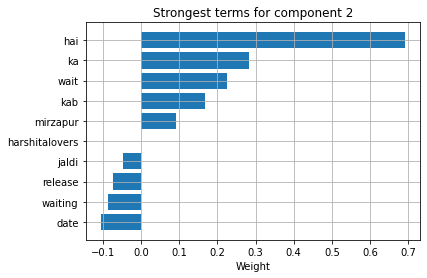

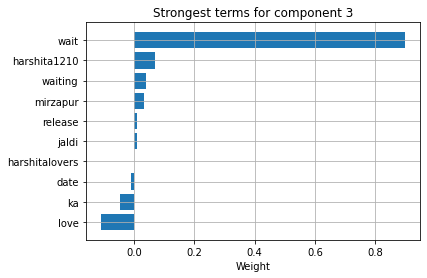

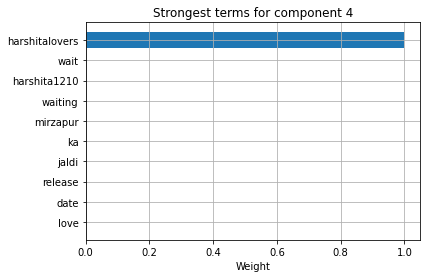

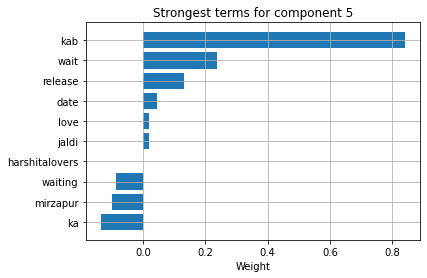

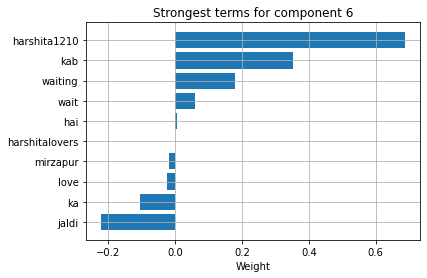

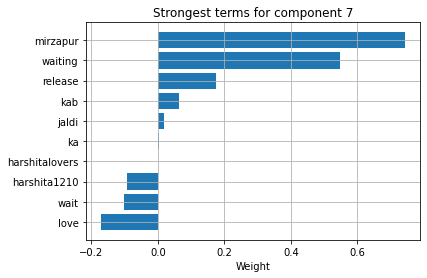

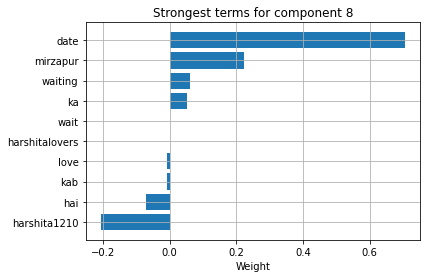

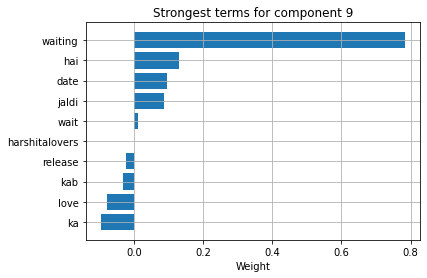

In [7]:
!pip install glove-python

# we need to pass splitted sentences to the model
import nltk,csv,numpy
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize, pos_tag
sentences=[]
reader = csv.reader(open('/content/drive/My Drive/instacomments.csv', 'rU'), delimiter= ",",quotechar='|')
for line in reader:
    for field in line:
      sentences.append(field)
print(sentences)
lines=sentences

#importing the glove library
from glove import Corpus, Glove
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from pylab import *
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import cluster
import matplotlib.pyplot as plt

from time import time


print("Using TFIDF Vectorizer to produce Sparse Matrix of Features")
t0 = time()

vectorizer = TfidfVectorizer(max_df=0.5,
                                 min_df=5, stop_words='english')
X = vectorizer.fit_transform(lines)
print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print("__________________________________________________________")
print()


# Creates Cosine Similarity Matrix
cosine_similarity = (X * X.T).A



## PLOTS ELBOW CURVE to find the "K" value
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()


# LSA dimension reduction
print("Performing LSA Dimension Reduction")
t0 = time()
svd = TruncatedSVD(10)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(X)

print("done in %fs" % (time() - t0))

print()
print("AFTER LSA matrix reduction: ")
print("n_samples: %d, n_features: %d" % X.shape)


#K-MEANS CLUSTERING
km = KMeans(n_clusters=3, init='k-means++')
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
y_means = km.predict(X)

#PLOTS K-MEANS CLUSTERING

# plt.scatter(X[:,0],X[:,1], c=y_means, s=50, cmap='viridis')
# centers = km.cluster_centers_
# plt.scatter(centers[:,0],centers[:,1],c='black',s=300,alpha=0.5);
# plt.show()

print("done in %0.3fs" % (time() - t0))
print()



#VISUALIZES STRONGEST TERMS OF COMPONENTS (LSA)
feat_names = vectorizer.get_feature_names()

for compNum in range(0,10):
    comp = svd.components_[compNum]

    indeces = np.argsort(comp).tolist()
    indeces.reverse()
    terms = [feat_names[weightIndex] for weightIndex in indeces[0:10]]
    weights = [comp[weightIndex] for weightIndex in indeces[0:10]]

    terms.reverse()
    weights.reverse()
    positions = arange(10) + .5    # the bar centers on the y axis

    figure(compNum)
    barh(positions, weights, align='center')
    yticks(positions, terms)
    xlabel('Weight')
    title('Strongest terms for component %d' % (compNum))
    grid(True)
    show()